In [8]:
import warnings
warnings.filterwarnings('ignore') # suppress import warnings

import os
import cv2
import tflearn
import numpy as np
import tensorflow as tf
from random import shuffle
from tqdm import tqdm 
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

TRAIN_DIR = 'train'
TEST_DIR = 'test1/test'
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = 'skin'.format(LR, '2conv-basic')
tf.logging.set_verbosity(tf.logging.ERROR) # suppress keep_dims warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # suppress tensorflow gpu logs
tf.reset_default_graph()


def label_skins(skin):
 
    skintype = skin[0]
    ans = [0,0,0,0,0,0,0,0,0,0]

    if skintype == 'S': ans = [1,0,0,0,0,0,0,0,0,0]
    elif skintype == 'A': ans = [0,1,0,0,0,0,0,0,0,0]
    elif skintype == 'B': ans = [0,0,1,0,0,0,0,0,0,0]
    elif skintype == 'L': ans = [0,0,0,1,0,0,0,0,0,0]
    elif skintype == 'W': ans = [0,0,0,0,1,0,0,0,0,0]
    elif skintype == 'R': ans = [0,0,0,0,0,1,0,0,0,0]
    elif skintype == 'H': ans = [0,0,0,0,0,0,1,0,0,0]
    elif skintype == 'E': ans = [0,0,0,0,0,0,0,1,0,0]
    elif skintype == 'P': ans = [0,0,0,0,0,0,0,0,1,0]
    elif skintype == 'M': ans = [0,0,0,0,0,0,0,0,0,1]

    return ans

def create_training_data():

    training_data = []

    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_skins(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])

    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

def main():
    
    train_data = create_training_data()
    convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 3], name='input')

    convnet = conv_2d(convnet, 32, 3, activation='relu')
    
    convnet = max_pool_2d(convnet, 3)

    convnet = conv_2d(convnet, 64, 3, activation='relu')
    convnet = max_pool_2d(convnet, 3)

    convnet = conv_2d(convnet, 128, 3, activation='relu')
    convnet = max_pool_2d(convnet, 3)

    convnet = conv_2d(convnet, 32, 3, activation='relu')
    convnet = max_pool_2d(convnet, 3)

    convnet = conv_2d(convnet, 64, 3, activation='relu')
    convnet = max_pool_2d(convnet, 3)

    convnet = fully_connected(convnet, 1024, activation='relu')
    convnet = dropout(convnet, 0.8)

    convnet = fully_connected(convnet, 10, activation='softmax')
    convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

    model = tflearn.DNN(convnet, tensorboard_dir='log')
    
    if os.path.exists('{}.meta'.format(MODEL_NAME)):
        model.load(MODEL_NAME)
        print('!! Model Loaded !!')

    train = train_data[:-50]
    test = train_data[-50:]

    X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
    Y = [i[1] for i in train]

    test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
    test_y = [i[1] for i in test]

    model.fit({'input': X}, {'targets': Y}, validation_batch_size = 4 , snapshot_epoch = 8, validation_set = ({'input': test_x}, {'targets': test_y}), snapshot_step = 40, show_metric = True, run_id = MODEL_NAME)

    model.save(MODEL_NAME)

if __name__ == '__main__': main()


Training Step: 1249  | total loss: 0.23875 | time: 2.360s
| Adam | epoch: 010 | loss: 0.23875 - acc: 0.9490 -- iter: 896/900
Training Step: 1250  | total loss: 0.21617 | time: 3.484s
| Adam | epoch: 010 | loss: 0.21617 - acc: 0.9509 | val_loss: 0.05292 - val_acc: 0.9200 -- iter: 900/900
--


100%|██████████| 1/1 [00:00<00:00, 125.32it/s]


Model Loaded!


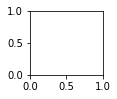

In [49]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
import shutil
import os
import sys
import cv2
from PIL import Image, ImageTk

window = tk.Tk()
window.title("Dr. Skin")
window.geometry("844x565")
window.iconbitmap("icon.ico")
window.configure(background ="#ebdddc")
load = Image.open("bgskin.jpg")
render = ImageTk.PhotoImage(load)
img = tk.Label(image=render, height="565", width="844")
img.image = render
img.place(x=0, y=0)

#ACNE
def acne():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")    
    def exit():
        window1.destroy()
    def acneinfo1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        info = "Information about Acne : \n\nAcne is a skin condition that occurs when your hair follicles become plugged with oil and dead skin cells.\n It often causes whiteheads, blackheads or pimples, and usually appears on the face, forehead,\n chest, upper back and shoulders. \n Acne is most common among teenagers, though it affects people of all ages. \n\nSYMPTOMS\n i.Acne signs and symptoms vary depending on the severity of your condition\nii.Whiteheads (closed plugged pores)\niii.Blackheads (open plugged pores)\niv.Small red, tender bumps (papules)\nv.Pimples (pustules), which are papules with pus at their tips\nvi.Large, solid, painful lumps beneath the surface of the skin (nodules)\nvii.Painful, pus-filled lumps beneath the surface of the skin (cystic lesions) \n\nCAUSES\ni.Excess oil production\nii.Hair follicles clogged by oil and dead skin cells\niii.Bacteria\niv.Excess activity of a type of hormone."
        info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
        info1.grid(column=0, row=7, padx=50, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    rem = "REMEDIES FOR ACNE :\n\n     i.Apply Tea tree oil\n   ii.Apply Aloe vera\niii.Apply Honey \n  iv.Stay hydrated."
    remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
    remedies.grid(column=0, row=7, padx=350, pady=10)
    button7 = tk.Button(text="Information", command=acneinfo1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.4, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.4, anchor="center")
    window1.mainloop()
def acneinfo():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def acnerem1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        rem = "REMEDIES FOR ACNE :\n\n     i.Apply Tea tree oil\n   ii.Apply Aloe vera\niii.Apply Honey \n  iv.Stay hydrated."
        remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
        remedies.grid(column=0, row=7, padx=350, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    info = "Information about Acne : \n\nAcne is a skin condition that occurs when your hair follicles become plugged with oil and dead skin cells.\n It often causes whiteheads, blackheads or pimples, and usually appears on the face, forehead,\n chest, upper back and shoulders. \n Acne is most common among teenagers, though it affects people of all ages. \n\nSYMPTOMS\n i.Acne signs and symptoms vary depending on the severity of your condition\nii.Whiteheads (closed plugged pores)\niii.Blackheads (open plugged pores)\niv.Small red, tender bumps (papules)\nv.Pimples (pustules), which are papules with pus at their tips\nvi.Large, solid, painful lumps beneath the surface of the skin (nodules)\nvii.Painful, pus-filled lumps beneath the surface of the skin (cystic lesions) \n\nCAUSES\ni.Excess oil production\nii.Hair follicles clogged by oil and dead skin cells\niii.Bacteria\niv.Excess activity of a type of hormone."
    info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
    info1.grid(column=0, row=7, padx=50, pady=10)
    button7 = tk.Button(text="Remedies", command=acnerem1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.8, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.8, anchor="center")
    window1.mainloop()
#BLISTER
def blister():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def blisterinfo1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        info = "Information about Blister :\n A blister is a bubble of fluid that forms beneath a thin layer of dead skin.\nThese blisters heal more slowly and may leave scars.\nMany diseases and injuries can cause blistering.\nHowever, blisters can be filled with blood known as blood blisters or with pus.\n\nSYMPTOMS\ni.A bruise is a traumatic injury of the soft tissues that results in breakage \n of the local capillaries and leakage of red blood cells. \nIn the skin, bruising can be seen as a reddish-purple discoloration that does not blanch when pressed upon.\n This discoloration leads to the classic black and blue appearance\nii.A rash can be caused, directly or indirectly,\n by a bacterial, viral, or fungal infection.\nRashes initially oozed, then scabbed over, and bled easily.\niii.Weakness and Fever.\n\nCAUSES\ni.Friction or Rubbing: Friction occurs when something rubs against your \n skin for a prolonged period of time.This happens most commonly on hands and feet.\nii.Contact dermatitis can also cause blisters.\niii.Freezing/Cold Injury can cause the blister "
        info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
        info1.grid(column=0, row=7, padx=10, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    rem = " REMEDIES for Blister :\n\ni.For a Blister that has not Popped:\n a.Try not to pop or drain it.\n b.Leave it uncovered or cover loosely with a bandage.\n c.Try not to put pressure on the area.\n If the blister is in a pressure area such as the bottom of the foot,\n put a donut-shaped moleskin on it.\n\nii.For a Blister That Has Popped:\n a.Wash the area with warm water and gentle soap.\n Do not use alcohol, hydrogen peroxide, or iodine.\n b.Smooth down the the skin flap that remains.\n c.Apply antibiotic ointment to the area.\n d.Cover the area loosely with a sterile bandage or gauze.\n\niii. Change the bandage daily and whenever it gets dirty or wet. "
    remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
    remedies.grid(column=0, row=7, padx=230, pady=10)
    button7 = tk.Button(text="Information", command=blisterinfo1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.7, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.7, anchor="center")
    window1.mainloop()
def blisterinfo():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def blisterrem1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        rem = " REMEDIES for Blister :\n\ni.For a Blister that has not Popped:\n a.Try not to pop or drain it.\n b.Leave it uncovered or cover loosely with a bandage.\n c.Try not to put pressure on the area.\n If the blister is in a pressure area such as the bottom of the foot,\n put a donut-shaped moleskin on it.\n\nii.For a Blister That Has Popped:\n a.Wash the area with warm water and gentle soap.\n Do not use alcohol, hydrogen peroxide, or iodine.\n b.Smooth down the the skin flap that remains.\n c.Apply antibiotic ointment to the area.\n d.Cover the area loosely with a sterile bandage or gauze.\n\niii. Change the bandage daily and whenever it gets dirty or wet. "
        remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
        remedies.grid(column=0, row=7, padx=230, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    info = "Information about Blister :\n A blister is a bubble of fluid that forms beneath a thin layer of dead skin.\nThese blisters heal more slowly and may leave scars.\nMany diseases and injuries can cause blistering.\nHowever, blisters can be filled with blood known as blood blisters or with pus.\n\nSYMPTOMS\ni.A bruise is a traumatic injury of the soft tissues that results in breakage \n of the local capillaries and leakage of red blood cells. \nIn the skin, bruising can be seen as a reddish-purple discoloration that does not blanch when pressed upon.\n This discoloration leads to the classic black and blue appearance\nii.A rash can be caused, directly or indirectly,\n by a bacterial, viral, or fungal infection.\nRashes initially oozed, then scabbed over, and bled easily.\niii.Weakness and Fever.\n\nCAUSES\ni.Friction or Rubbing: Friction occurs when something rubs against your \n skin for a prolonged period of time.This happens most commonly on hands and feet.\nii.Contact dermatitis can also cause blisters.\niii.Freezing/Cold Injury can cause the blister "
    info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
    info1.grid(column=0, row=7, padx=10, pady=10)
    button7 = tk.Button(text="Remedies", command=blisterrem1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.8, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.8, anchor="center")
    window1.mainloop()
#LUPUS
def lupus():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def lupusinfo1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        info = "Information about Lupus : \n\nLupus is an ongoing or chronic disease that can have a widespread effect on the body,\nincluding the skin, joints, muscles and other organs. \nLupus can be a mild disease or the progression of it can result in serious, \neven fatal complications to vital organs. \n SYMPTOMS \nfatigue \na loss of appetite and weight loss \npain or swelling in joints and muscles \nswelling in the legs or around the eyes swollen glands \nCAUSES \n Exposure to sunlight."
        info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
        info1.grid(column=0, row=7, padx=130, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    rem = "REMEDIES for Lupus  : \n1. Medication can help to: \ni.Reduce pain and swelling \nii.Regulate the activity of the immune system \niii.Balance hormones \n2. Apart from medication, the following may help to relieve pain or reduce the risk of a flare: \ni. Participating in relaxation or meditation activities, including yoga \nii.Doing regular exercise when possible \niii.Avoiding exposure to the sun \niv.Avoid stress, as far as possible. "
    remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
    remedies.grid(column=0, row=7, padx=100, pady=10)
    button7 = tk.Button(text="Information", command=lupusinfo1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.4, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.4, anchor="center")
    window1.mainloop()
def lupusinfo():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def lupusrem1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        rem = "REMEDIES for Lupus  : \n1. Medication can help to: \ni.Reduce pain and swelling \nii.Regulate the activity of the immune system \niii.Balance hormones \n2. Apart from medication, the following may help to relieve pain or reduce the risk of a flare: \ni. Participating in relaxation or meditation activities, including yoga \nii.Doing regular exercise when possible \niii.Avoiding exposure to the sun \niv.Avoid stress, as far as possible. "
        remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
        remedies.grid(column=0, row=7, padx=100, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    info = "Information about Lupus : \n\nLupus is an ongoing or chronic disease that can have a widespread effect on the body,\nincluding the skin, joints, muscles and other organs. \nLupus can be a mild disease or the progression of it can result in serious, \neven fatal complications to vital organs. \n SYMPTOMS \nfatigue \na loss of appetite and weight loss \npain or swelling in joints and muscles \nswelling in the legs or around the eyes swollen glands \nCAUSES \n Exposure to sunlight."
    info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
    info1.grid(column=0, row=7, padx=130, pady=10)
    button7 = tk.Button(text="Remedies", command=lupusrem1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.5, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.5, anchor="center")
    window1.mainloop()
#WART
def wart():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def wartinfo1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        info = "Information about Wart :\n\nWarts are generally skin-coloured, though they may be darker or lighter. \nThe surface of warts may be smooth or rough. \nEven the shapes can vary significantly. \nSome warts are flat, large and fleshy, and some may be thin, long and cylindrical.\nWarts can occur on any part of the body, but commonly affected areas include the following:\n1.Hands\n2.Feet (especially soles)\n3.Face and neck\n\nSYMPTOMS\ni.The symptoms will usually be pain, itching, or a Bleeding.\nVisible warts are:\n a.mucous membrane growths\n b.black dots\n c.rough bumps\nd.Some Warts look like flat white patches\ne.Some are bumpy\n\nCAUSES\ni.Warts are caused by the DNA-containing human papillomavirus (HPV). \nThere are at least 100 genetically different types of HPVs.\n ii.The virus enters the skin after direct contact with recently shed viruses kept alive in warm,\n moist environments such as a locker room, or by direct contact with an infected person.\niii.The entry site is often an area of recent skin injury.\niv.Contrary to popular mythology, touching a frog will not give a person warts."
        info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
        info1.grid(column=0, row=7, padx=100, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    rem = "Remedies for Wart:\n\ni. Aloe vera has anti-inflammatory properties that make it very effective in treating warts.\nIngredients: Cactus leaf.\nMethod of preparation and use:\nThe aloe vera gel is extracted from the cactus leaf after peeling, \nthen a small cotton tube is immersed in the gel and placed on the wart, \nand then the cotton is fixed on the wart with wound glue, \nrepeated twice a day for two weeks to\n obtain the best results.\nii. Baking soda and white vinegar baking soda contains antiseptic properties and anti-properties,\nmaking them effective in the fight against viruses that cause warts.\niii.Garlic\nIngredients: a few cloves of garlic.\nPreparation and use:   \n Peel garlic cloves and then crushed to form a paste, \nthen rubbing the affected area, \nand repeat it daily until the wart disappears."
    remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
    remedies.grid(column=0, row=7, padx=70, pady=10)
    button7 = tk.Button(text="Information", command=wartinfo1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.7, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.7, anchor="center")
    window1.mainloop()
def wartinfo():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def wartrem1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        rem = "Remedies for Wart:\n\ni. Aloe vera has anti-inflammatory properties that make it very effective in treating warts.\nIngredients: Cactus leaf.\nMethod of preparation and use:\nThe aloe vera gel is extracted from the cactus leaf after peeling, \nthen a small cotton tube is immersed in the gel and placed on the wart, \nand then the cotton is fixed on the wart with wound glue, \nrepeated twice a day for two weeks to\n obtain the best results.\nii. Baking soda and white vinegar baking soda contains antiseptic properties and anti-properties,\nmaking them effective in the fight against viruses that cause warts.\niii.Garlic\nIngredients: a few cloves of garlic.\nPreparation and use:   \n Peel garlic cloves and then crushed to form a paste, \nthen rubbing the affected area, \nand repeat it daily until the wart disappears."
        remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
        remedies.grid(column=0, row=7, padx=70, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    info = "Information about Wart :\n\nWarts are generally skin-coloured, though they may be darker or lighter. \nThe surface of warts may be smooth or rough. \nEven the shapes can vary significantly. \nSome warts are flat, large and fleshy, and some may be thin, long and cylindrical.\nWarts can occur on any part of the body, but commonly affected areas include the following:\n1.Hands\n2.Feet (especially soles)\n3.Face and neck\n\nSYMPTOMS\ni.The symptoms will usually be pain, itching, or a Bleeding.\nVisible warts are:\n a.mucous membrane growths\n b.black dots\n c.rough bumps\nd.Some Warts look like flat white patches\ne.Some are bumpy\n\nCAUSES\ni.Warts are caused by the DNA-containing human papillomavirus (HPV). \nThere are at least 100 genetically different types of HPVs.\n ii.The virus enters the skin after direct contact with recently shed viruses kept alive in warm,\n moist environments such as a locker room, or by direct contact with an infected person.\niii.The entry site is often an area of recent skin injury.\niv.Contrary to popular mythology, touching a frog will not give a person warts."
    info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
    info1.grid(column=0, row=7, padx=100, pady=10)
    button7 = tk.Button(text="Remedies", command=wartrem1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.95, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.95, anchor="center")
    window1.mainloop()
#RINGWORM    
def ringworm():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def ringworminfo1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        info = "Information about Ringworm :\n\n\nThis infections are commonly called ringworm \nbecause some infections form a ring-like pattern on affected areas of the body. \nFacial ringworm also known as ringworm of\n the face, is a common, \nnon-cancerous (benign)\n fungal infection of the surface skin of the face.\nFacial ringworm may be passed to humans by direct contact with infected people, \ninfected animals,contaminated objects (such as towels) or the soil.\n\nSYMPTOMS \nRingworm can present as any one or a combination of the following symptoms:\ni.Ring-shaped rash\n ii.Itching\niii.Burning\niv.Scaling\nv.Discomfort\n\n CAUSES\ni.Skin-to-skin contact with an infected person or animal\nii.Indirect contact with a surface touched by an infected person or animal\niii.In rare cases, ringworm can be spread through soil."
        info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
        info1.grid(column=0, row=7, padx=130, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    rem = "The remedies for Ringworm are :\n\ni.Garlic\nii.Tea Tree oil\niii.Coconut Oil\niv.Turmeric Aloe\nv.Vera "
    remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
    remedies.grid(column=0, row=7, padx=360, pady=10)
    button7 = tk.Button(text="Information", command=ringworminfo1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.4, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.4, anchor="center")
    window1.mainloop()
def ringworminfo():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def ringwormrem1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        rem = "The remedies for Ringworm are :\n\ni.Garlic\nii.Tea Tree oil\niii.Coconut Oil\niv.Turmeric Aloe\nv.Vera "
        remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
        remedies.grid(column=0, row=7, padx=360, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    info = "Information about Ringworm :\n\n\nThis infections are commonly called ringworm \nbecause some infections form a ring-like pattern on affected areas of the body. \nFacial ringworm also known as ringworm of\n the face, is a common, \nnon-cancerous (benign)\n fungal infection of the surface skin of the face.\nFacial ringworm may be passed to humans by direct contact with infected people, \ninfected animals,contaminated objects (such as towels) or the soil.\n\nSYMPTOMS \nRingworm can present as any one or a combination of the following symptoms:\ni.Ring-shaped rash\n ii.Itching\niii.Burning\niv.Scaling\nv.Discomfort\n\n CAUSES\ni.Skin-to-skin contact with an infected person or animal\nii.Indirect contact with a surface touched by an infected person or animal\niii.In rare cases, ringworm can be spread through soil."
    info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
    info1.grid(column=0, row=7, padx=130, pady=10)
    button7 = tk.Button(text="Remedies", command=ringwormrem1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.9, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.9, anchor="center") 
    window1.mainloop()
#HIVES    
def hives():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def hivesinfo1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        info = "Information about Hives :\nHives, also known as urticaria, is a kind of skin rash with red, raised, itchy bumps.\nHives can change size rapidly and move around, \ndisappearing in one place and reappearing in other places, often in a matter of hours. \nOccasionally hives are produced by direct physical stimulation by \nenvironmental forces like heat, cold, and sunlight."
        info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
        info1.grid(column=0, row=7, padx=100, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    rem = "Remedies for Hives : \ni.Cold Compress.\nii.Wrap some ice cubes in a cloth. \nPlace it over the affected skin for 10 minutes at a time, 3 or 4 times a day.\nNote: Never put ice directly on the skin or for a prolonged period of time.\niii.Put 2 tablespoons of baking soda in a small bowl. \nAdd enough water to make a thick paste. \nSpread the paste on the affected area. \nLeave it on for 10 minutes before rinsing it off with warm water \niv.You can also drink 2 tablespoons of aloe vera juice daily to boost your immune system. "
    remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
    remedies.grid(column=0, row=7, padx=100, pady=10)
    button7 = tk.Button(text="Information", command=hivesinfo1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.4, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.4, anchor="center")
    window1.mainloop()
def hivesinfo():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def hivesrem1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        rem = "Remedies for Hives : \ni.Cold Compress.\nii.Wrap some ice cubes in a cloth. \nPlace it over the affected skin for 10 minutes at a time, 3 or 4 times a day.\nNote: Never put ice directly on the skin or for a prolonged period of time.\niii.Put 2 tablespoons of baking soda in a small bowl. \nAdd enough water to make a thick paste. \nSpread the paste on the affected area. \nLeave it on for 10 minutes before rinsing it off with warm water \niv.You can also drink 2 tablespoons of aloe vera juice daily to boost your immune system. "
        remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
        remedies.grid(column=0, row=7, padx=100, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    info = "Information about Hives :\nHives, also known as urticaria, is a kind of skin rash with red, raised, itchy bumps.\nHives can change size rapidly and move around, \ndisappearing in one place and reappearing in other places, often in a matter of hours. \nOccasionally hives are produced by direct physical stimulation by \nenvironmental forces like heat, cold, and sunlight."
    info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
    info1.grid(column=0, row=7, padx=100, pady=10)
    button7 = tk.Button(text="Remedies", command=hivesrem1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.4, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.4, anchor="center") 
    window1.mainloop()
#ECZEMA    
def eczema():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def eczemainfo1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        info = "Information about Eczema :\n\nEczema is almost always itchy.\nSometimes the itching will start before the rash appears,\nbut when it does, the rash most commonly appears on the face,\nback of the knees,wrists, hands, or feet. \nIt may also affect other areas as well. \nAffected areas usually appear very dry, thickened, or scaly.\nIn fair-skinned people, these areas may initially appear reddish and then turn Black.\nAmong darker-skinned people, eczema can affect pigmentation, \nmaking the affected area lighter or darker."
        info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
        info1.grid(column=0, row=7, padx=110, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    rem = "The remedies for Eczema are : \n\ni.Apply Vegetable Shortening\nii.Incorporate Turmeric in Your Diet\niii.Apply Olive Oil\niv.Apply Aloe Vera"
    remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
    remedies.grid(column=0, row=7, padx=350, pady=10)
    button7 = tk.Button(text="Information", command=eczemainfo1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.4, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.4, anchor="center")
    window1.mainloop()
def eczemainfo():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def eczemarem1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        rem = "The remedies for Eczema are : \n\ni.Apply Vegetable Shortening\nii.Incorporate Turmeric in Your Diet\niii.Apply Olive Oil\niv.Apply Aloe Vera"
        remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
        remedies.grid(column=0, row=7, padx=350, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    info = "Information about Eczema :\n\nEczema is almost always itchy.\nSometimes the itching will start before the rash appears,\nbut when it does, the rash most commonly appears on the face,\nback of the knees,wrists, hands, or feet. \nIt may also affect other areas as well. \nAffected areas usually appear very dry, thickened, or scaly.\nIn fair-skinned people, these areas may initially appear reddish and then turn Black.\nAmong darker-skinned people, eczema can affect pigmentation, \nmaking the affected area lighter or darker."
    info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
    info1.grid(column=0, row=7, padx=110, pady=10)
    button7 = tk.Button(text="Remedies", command=eczemarem1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.5, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.5, anchor="center")
    window1.mainloop()
#PSORIASIS    
def psoriasis():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def psoriasisinfo1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        info = "Information about Psoriasis :\n\n i) Psoriasis is a common skin condition that speeds up the life cycle of skin cells. \nIt causes cells to build up rapidly on the surface of the skin. \nii) Red patches of skin covered with thick, silvery scales \niii)Small scaling spots (commonly seen in children)\niv) Dry, cracked skin that may bleed\nv)Itching, burning or soreness \nvi)Thickened, pitted or ridged nails \nvii)Swollen and stiff joints."
        info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
        info1.grid(column=0, row=7, padx=150, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    rem = "Remedies for Psoriasis :\n\n i. Salt baths : \nYou can try adding Epsom salt, mineral oil, colloidal oatmeal, \nor olive oil to help with itching and irritation. \nBathing with Dead Sea salts in particular \nhas shown a beneficial effect for treating psoriasis.\nii. Aloe vera\niii. Turmeric \niv Maintaining a healthy weight. "
    remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
    remedies.grid(column=0, row=7, padx=250, pady=10)    
    button7 = tk.Button(text="Information", command=psoriasisinfo1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.4, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.4, anchor="center")
    window1.mainloop()
def psoriasisinfo():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def psoriasisrem1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        rem = "Remedies for Psoriasis :\n\n i. Salt baths : \nYou can try adding Epsom salt, mineral oil, colloidal oatmeal, \nor olive oil to help with itching and irritation. \nBathing with Dead Sea salts in particular \nhas shown a beneficial effect for treating psoriasis.\nii. Aloe vera\niii. Turmeric \niv Maintaining a healthy weight. "
        remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
        remedies.grid(column=0, row=7, padx=250, pady=10)    
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    info = "Information about Psoriasis :\n\n i) Psoriasis is a common skin condition that speeds up the life cycle of skin cells. \nIt causes cells to build up rapidly on the surface of the skin. \nii) Red patches of skin covered with thick, silvery scales \niii)Small scaling spots (commonly seen in children)\niv) Dry, cracked skin that may bleed\nv)Itching, burning or soreness \nvi)Thickened, pitted or ridged nails \nvii)Swollen and stiff joints."
    info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
    info1.grid(column=0, row=7, padx=150, pady=10)
    button7 = tk.Button(text="Remedies", command=psoriasisrem1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.5, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.5, anchor="center")
    window1.mainloop()
#MEASLES
def measles():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def measlesinfo1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        info = "Information about Measles :\n\n Measles signs and symptoms appear around 10 to 14 days after exposure to the virus.\n Signs and symptoms of measles typically include:\n i) Fever\nii)Dry cough\niii)Runny nose\niv)Sore throat\nv)Inflamed eyes (conjunctivitis)\nvi) Tiny white spots with bluish-white centers on a red background\nfound inside the mouth \non the inner lining of the cheek also called Kopliks spots\nvii) A skin rash made up of large, flat blotches \nthat often flow into one another."
        info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
        info1.grid(column=0, row=7, padx=110, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    rem = "Remedies for Measles :\n\ni)Tamarind seeds and turmeric: \nPowder tamarind seeds, \nmix equal portion of the tamarind seeds powder with turmeric powder ,\nthis mix should be given in the doses of 350gm to 425gm,\nthree times, daily to the person suffering from measles.\nii) Margosa leaves: \nMargosa leaves can be added to hot bathing water,\nto relieve the patient of itching , that comes with the rash.\nPatient should be immersed in the water for at least 20minutes, for better results.\niii) Garlic: \nPowder the cloves of garlic and mix with honey \nand apply this daily for better results.\niv) Orange juice: \nOrange is an excellent natural cure for measles.\nAs the patient will feel a loss of appetite \nand the lack of saliva in his tongue, \noften the patient does not feel thirsty or hungry."
    remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
    remedies.grid(column=0, row=7, padx=110, pady=10)
    button7 = tk.Button(text="Information", command=measlesinfo1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.8, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.8, anchor="center")
    window1.mainloop()
def measlesinfo():
    window.destroy()
    window1 = tk.Tk()
    window1.title("Dr. Skin")
    window1.geometry("1000x700")
    window1.iconbitmap("icon.ico")
    window1.configure(background="#ebdddc")
    def exit():
        window1.destroy()
    def measlesrem1():
        window1.destroy()
        window2 = tk.Tk()
        window2.title("Dr. Skin")
        window2.geometry("1000x700")
        window2.iconbitmap("icon.ico")
        window2.configure(background="#ebdddc")
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="700", width="1000")
        img.image = render
        img.place(x=0, y=0)
        rem = "Remedies for Measles :\n\ni)Tamarind seeds and turmeric: \nPowder tamarind seeds, \nmix equal portion of the tamarind seeds powder with turmeric powder ,\nthis mix should be given in the doses of 350gm to 425gm,\nthree times, daily to the person suffering from measles.\nii) Margosa leaves: \nMargosa leaves can be added to hot bathing water,\nto relieve the patient of itching , that comes with the rash.\nPatient should be immersed in the water for at least 20minutes, for better results.\niii) Garlic: \nPowder the cloves of garlic and mix with honey \nand apply this daily for better results.\niv) Orange juice: \nOrange is an excellent natural cure for measles.\nAs the patient will feel a loss of appetite \nand the lack of saliva in his tongue, \noften the patient does not feel thirsty or hungry."
        remedies = tk.Label(text=rem, background="#ebdddc",fg="black", font=("", 15))
        remedies.grid(column=0, row=7, padx=110, pady=10)
        window2.mainloop()   
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="700", width="1000")
    img.image = render
    img.place(x=0, y=0)
    info = "Information about Measles :\n\n Measles signs and symptoms appear around 10 to 14 days after exposure to the virus.\n Signs and symptoms of measles typically include:\n i) Fever\nii)Dry cough\niii)Runny nose\niv)Sore throat\nv)Inflamed eyes (conjunctivitis)\nvi) Tiny white spots with bluish-white centers on a red background\nfound inside the mouth \non the inner lining of the cheek also called Kopliks spots\nvii) A skin rash made up of large, flat blotches \nthat often flow into one another."
    info1 = tk.Label(text=info, background="#ebdddc",fg="black", font=("", 15))
    info1.grid(column=0, row=7, padx=110, pady=10)
    button7 = tk.Button(text="Remedies", command=measlesrem1)
    button7.grid(column=0, row=9, padx=20, pady=20)
    button7.place(relx=0.45, rely=0.8, anchor="center")
    button8 = tk.Button(text="Exit", command=exit)
    button8.grid(column=1, row=9, padx=20, pady=20)
    button8.place(relx=0.55, rely=0.8, anchor="center")   
    window1.mainloop()
def analysis():
    import cv2  # working with, mainly resizing, images
    import numpy as np  # dealing with arrays
    import os  # dealing with directories
    from random import shuffle  # mixing up or currently ordered data that might lead our network astray in training.
    from tqdm import tqdm  # a nice pretty percentage bar for tasks.
    verify_dir = 'testpicture'
    IMG_SIZE = 50
    LR = 1e-3
    MODEL_NAME = 'skin'.format(LR, '2conv-basic')

    def process_verify_data():
        verifying_data = []
        for img in tqdm(os.listdir(verify_dir)):
            path = os.path.join(verify_dir, img)
            img_num = img.split('.')[0]
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            verifying_data.append([np.array(img), img_num])
        np.save('verify_data.npy', verifying_data)
        return verifying_data

    verify_data = process_verify_data()
    
    import tflearn
    from tflearn.layers.conv import conv_2d, max_pool_2d
    from tflearn.layers.core import input_data, dropout, fully_connected
    from tflearn.layers.estimator import regression
    import tensorflow as tf
    tf.reset_default_graph()

    convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 3], name='input')

    convnet = conv_2d(convnet, 32, 3, activation='relu')
    convnet = max_pool_2d(convnet, 3)

    convnet = conv_2d(convnet, 64, 3, activation='relu')
    convnet = max_pool_2d(convnet, 3)

    convnet = conv_2d(convnet, 128, 3, activation='relu')
    convnet = max_pool_2d(convnet, 3)
    
    convnet = conv_2d(convnet, 32, 3, activation='relu')
    convnet = max_pool_2d(convnet, 3)

    convnet = conv_2d(convnet, 64, 3, activation='relu')
    convnet = max_pool_2d(convnet, 3)

    convnet = fully_connected(convnet, 1024, activation='relu')
    convnet = dropout(convnet, 0.8)

    convnet = fully_connected(convnet, 10, activation='softmax')
    convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

    model = tflearn.DNN(convnet, tensorboard_dir='log')

    if os.path.exists('{}.meta'.format(MODEL_NAME)):
        model.load(MODEL_NAME)
        print('Model Loaded!')
    import matplotlib.pyplot as plt
    fig = plt.figure()

    for num, data in enumerate(verify_data):

        img_num = data[1]
        img_data = data[0]

        y = fig.add_subplot(3, 4, num + 1)
        orig = img_data
        data = img_data.reshape(IMG_SIZE, IMG_SIZE, 3)
        model_out = model.predict([data])[0]

        if np.argmax(model_out) == 0:
            str_label = 'healthy'
        elif np.argmax(model_out) == 1:
            str_label = 'acne'
        elif np.argmax(model_out) == 2:
            str_label = 'blister'
        elif np.argmax(model_out) == 3:
            str_label = 'lupus'
        elif np.argmax(model_out) == 4:
            str_label = 'wart'
        elif np.argmax(model_out) == 5:
            str_label = 'ringworm'
        elif np.argmax(model_out) == 6:
            str_label = 'hives'
        elif np.argmax(model_out) == 7:
            str_label = 'eczema'
        elif np.argmax(model_out) == 8:
            str_label = 'psoriasis'
        elif np.argmax(model_out) == 9:
            str_label = 'measles'

        if str_label =='healthy':
            status ="HEALTHY"
        else:
            status = "UNHEALTHY"
        load = Image.open("bgskin2.jpg")
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="565", width="844")
        img.image = render
        img.place(x=0, y=0)
        
       
        load = Image.open(fileName)
        render = ImageTk.PhotoImage(load)
        img = tk.Label(image=render, height="250", width="500")
        img.image = render
        img.place(x=0, y=0)
        img.grid(column=0, row=1, padx=170, pady = 10)
        
        message = tk.Label(text='Status: '+status, background="#ebdddc",
                           fg="Black", font=("", 15))
        message.grid(column=0, row=3, padx=100, pady=10)
        if str_label == 'acne':
            diseasename = "Acne"
            
            disease = tk.Label(text='Disease Name: ' + diseasename, background="#ebdddc",fg="Black", font=("", 15))
            disease.grid(column=0, row=4, padx=10, pady=10)
            r = tk.Label(text='Click below for Remedies...', background="#ebdddc", fg="Black", font=("", 15))
            r.grid(column=0, row=5, padx=10, pady=10)
            
            button4 = tk.Button(text="Remedies", command=acne)
            button4.grid(column=0, row=6, padx=10, pady=10)
            button5 = tk.Button(text="Info", command=acneinfo)
            button5.grid(column=0, row=8, padx=10, pady=10)
        elif str_label == 'blister':
            diseasename = "Blister"
            disease = tk.Label(text='Disease Name: ' + diseasename, background="#ebdddc",fg="Black", font=("", 15))
            disease.grid(column=0, row=4, padx=10, pady=10)
            r = tk.Label(text='Click below for Remedies...', background="#ebdddc", fg="Black", font=("", 15))
            r.grid(column=0, row=5, padx=10, pady=10)
            button4 = tk.Button(text="Remedies", command=blister)
            button4.grid(column=0, row=6, padx=10, pady=10)
            button5 = tk.Button(text="Info", command=blisterinfo)
            button5.grid(column=0, row=7, padx=10, pady=10)
        elif str_label == 'lupus':
            diseasename = "Lupus"
            disease = tk.Label(text='Disease Name: ' + diseasename, background="#ebdddc",fg="Black", font=("", 15))
            disease.grid(column=0, row=4, padx=10, pady=10)
            r = tk.Label(text='Click below for Remedies...', background="#ebdddc", fg="Black", font=("", 15))
            r.grid(column=0, row=5, padx=10, pady=10)
            button4 = tk.Button(text="Remedies", command=lupus)
            button4.grid(column=0, row=6, padx=10, pady=10)
            button5 = tk.Button(text="Info", command=lupusinfo)
            button5.grid(column=0, row=7, padx=10, pady=10)
        elif str_label == 'wart':
            diseasename = "Wart"
            disease = tk.Label(text='Disease Name: ' + diseasename, background="#ebdddc",fg="Black", font=("", 15))
            disease.grid(column=0, row=4, padx=10, pady=10)
            r = tk.Label(text='Click below for Remedies...', background="#ebdddc", fg="Black", font=("", 15))
            r.grid(column=0, row=5, padx=10, pady=10)
            button4 = tk.Button(text="Remedies", command=wart)
            button4.grid(column=0, row=6, padx=10, pady=10)
            button5 = tk.Button(text="Info", command=wartinfo)
            button5.grid(column=0, row=7, padx=10, pady=10)
        elif str_label == 'ringworm':
            diseasename = "Ringworm"
            disease = tk.Label(text='Disease Name: ' + diseasename, background="#ebdddc",fg="Black", font=("", 15))
            disease.grid(column=0, row=4, padx=10, pady=10)
            r = tk.Label(text='Click below for Remedies...', background="#ebdddc", fg="Black", font=("", 15))
            r.grid(column=0, row=5, padx=10, pady=10)
            button4 = tk.Button(text="Remedies", command=ringworm)
            button4.grid(column=0, row=6, padx=10, pady=10)
            button5 = tk.Button(text="Info", command=ringworminfo)
            button5.grid(column=0, row=7, padx=10, pady=10)
        elif str_label == 'hives':
            diseasename = "Hives"
            disease = tk.Label(text='Disease Name: ' + diseasename, background="#ebdddc",fg="Black", font=("", 15))
            disease.grid(column=0, row=4, padx=10, pady=10)
            r = tk.Label(text='Click below for Remedies...', background="#ebdddc", fg="Black", font=("", 15))
            r.grid(column=0, row=5, padx=10, pady=10)
            button4 = tk.Button(text="Remedies", command=hives)
            button4.grid(column=0, row=6, padx=10, pady=10)
            button5 = tk.Button(text="Info", command=hivesinfo)
            button5.grid(column=0, row=7, padx=10, pady=10)
        elif str_label == 'eczema':
            diseasename = "Eczema"
            disease = tk.Label(text='Disease Name: ' + diseasename, background="#ebdddc",fg="Black", font=("", 15))
            disease.grid(column=0, row=4, padx=10, pady=10)
            r = tk.Label(text='Click below for Remedies...', background="#ebdddc", fg="Black", font=("", 15))
            r.grid(column=0, row=5, padx=10, pady=10)
            button4 = tk.Button(text="Remedies", command=eczema)
            button4.grid(column=0, row=6, padx=10, pady=10)
            button5 = tk.Button(text="Info", command=eczemainfo)
            button5.grid(column=0, row=7, padx=10, pady=10)
        elif str_label == 'psoriasis':
            diseasename = "Psoriasis"
            disease = tk.Label(text='Disease Name: ' + diseasename, background="#ebdddc",fg="Black", font=("", 15))
            disease.grid(column=0, row=4, padx=10, pady=10)
            r = tk.Label(text='Click below for Remedies...', background="#ebdddc", fg="Black", font=("", 15))
            r.grid(column=0, row=5, padx=10, pady=10)
            button4 = tk.Button(text="Remedies", command=psoriasis)
            button4.grid(column=0, row=6, padx=10, pady=10)
            button5 = tk.Button(text="Info", command=psoriasisinfo)
            button5.grid(column=0, row=7, padx=10, pady=10)
        elif str_label == 'measles':
            diseasename = "Measles"
            disease = tk.Label(text='Disease Name: ' + diseasename, background="#ebdddc",fg="Black", font=("", 15))
            disease.grid(column=0, row=4, padx=10, pady=10)
            r = tk.Label(text='Click below for Remedies...', background="#ebdddc", fg="Black", font=("", 15))
            r.grid(column=0, row=5, padx=10, pady=10)
            button4 = tk.Button(text="Remedies", command=measles)
            button4.grid(column=0, row=6, padx=10, pady=10)
            button5 = tk.Button(text="Info", command=measlesinfo)
            button5.grid(column=0, row=7, padx=10, pady=10)   

def openphoto():
    global fileName
    dirPath = "testpicture"
    fileList = os.listdir(dirPath)
    for fileName in fileList:
        os.remove(dirPath + "/" + fileName)   
    fileName = askopenfilename(initialdir='C:/Users/Rohit Shinde/Documents/Skin Disease Detection', title='Select image for analysis ',
                           filetypes=[('image files', '*.*')])
    dst = "C:/Users/Rohit Shinde/Documents/Skin Disease Detection/testpicture"
    shutil.copy(fileName, dst)
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="565", width="844")
    img.image = render
    img.place(x=0, y=0)
    load = Image.open(fileName)
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="250", width="500")
    img.image = render
    img.place(x=0, y=0)
    img.grid(column=1, row=1, padx=170, pady = 10)
    button1.destroy()
    button2.destroy()
    button3 = tk.Button(text="Analyse", command=analysis, width=20, height=5)
    button3.grid(column=0, row=8, padx=10, pady = 10)
    button3.place(relx=0.5, rely=0.6, anchor="center")
    
def capturephoto():
    global fileName
    dirPath = "testpicture"
    fileList = os.listdir(dirPath)
    for fileName in fileList:
        os.remove(dirPath + "/" + fileName)
      
    cam = cv2.VideoCapture(0)
    cv2.namedWindow("test")
    img_counter = 0
    while True:
        ret, frame = cam.read()
        if not ret:
            print("failed to grab frame")
            break
        cv2.imshow("test", frame)

        k = cv2.waitKey(1)
        if k%256 == 27:
            # ESC pressed
            print("Escape hit, closing...")
            break
        elif k%256 == 32:
            # SPACE pressed
            img_name = "capturedimage.png".format(img_counter)
            cv2.imwrite(img_name, frame)
            print("{} written!".format(img_name))
            img_counter += 1
    cam.release()
    
    load = Image.open("bgskin2.jpg")
    render = ImageTk.PhotoImage(load)
    img = tk.Label(image=render, height="565", width="844")
    img.image = render
    img.place(x=0, y=0)
    
    fileName = "capturedimage.png"
    dst = "C:/Users/Rohit Shinde/Documents/Skin Disease Detection/testpicture"
    shutil.copy(fileName, dst)
    load = Image.open(fileName)
    render = ImageTk.PhotoImage(load) 
    img = tk.Label(image=render, height="250", width="500")
    img.image = render
    img.place(x=100, y=0)
    img.grid(column=0, row=1, padx=170, pady = 10)
    button1.destroy()
    button2.destroy()
    button3 = tk.Button(text="Analyse", command=analysis, width=20, height=5)
    button3.grid(column=0, row=8, padx=10, pady=10)
    button3.place(relx=0.5, rely=0.6, anchor="center")
button1 = tk.Button(text="Browse Image", command = openphoto, width=20,height=5)
button1.grid(row=500, column=0, padx=1, pady = 200)
button1.place(relx=0.4, rely=0.6, anchor="center")
button2 = tk.Button(text="Capture Image", command = capturephoto, width=20,height=5)
button2.grid(row=500, column=1, padx=1, pady = 10)
button2.place(relx=0.6, rely=0.6, anchor="center")
window.mainloop()